# DSCI 525 - Web and Cloud Computing

***Milestone 3:*** This milestone aims to set up your spark cluster and develop your machine learning to deploy in the cloud for the next milestone.

## Milestone 3 checklist  :
- [X] Setup your EMR cluster with Spark, Hadoop, JupyterEnterpriseGateway, JupyterHub 1.1.0, and Livy.  
- [X] Make sure you set up foxy proxy for your web browser(Firefox). Probably you already set this up from the previous milestone.
- [X] Develop a ML model using scikit-learn. (We will be using this model to deploy for our next milestone.)
- [X] Obtain the best hyperparameter settings using spark's MLlib.

**Keep in mind:**

- _Please use the Firefox browser for this milestone. Make sure you got foxy proxy setup._

- _All services you use are in region us-west-2 region._

- _Use only default VPC and subnet, if not specified explicitly in instruction, leave all other options default when setting up your cluster._
    
- _No IP addresses are visible when you provide the screenshot (***Please mask it before uploading***)._

- _1 node cluster with a single master node (zero slave nodes) of size ```m5.xlarge``` is good enough for your spark MLlib process. These configurations might take 15 - 20 minutes to get optimal tuning parameters for the entire dataset._

- _Say something went wrong and you want to spin up another EMR cluster, then make sure you terminate the previous one._

- _Upon termination, stored data in your cluster will be lost. Make sure you save any data to S3 and download the notebooks to your laptop so that next time you have your jupyterHub in a different cluster, you can upload your notebook there._

_***Outside of Milestone [OPTIONAL]:*** You are encouraged to practice it yourself by spinning up EMR clusters._

***VERY IMPORTANT:*** With task 4, make sure you occasionally download the notebook to your local computer. Once the lab is stopped after 3 hours, your EMR cluster will be terminated, and everything will vanish.

### 1. Setup your EMR cluster
rubric={correctness:25}

Follow the instructions shown during the lecture to set up your EMR cluster. I am adding instructions here again for guidance.

1.1) Go to advanced options.

1.2) Choose Release 6.5.0.

1.3) Check Spark, Hadoop, JupyterEnterpriseGateway, JupyterHub 1.1.0, and Livy.  

1.4) Core instances to be 0, master 1.
    
1.5) By default, the instance will be selected as m5.xlarge. However, you can also choose a bigger instance (e.g., m4.4xlarge, but make sure you budget )

1.6) Cluster name : Your-group-number.
    
1.7) Uncheck Enable auto-termination.
        
1.8) Select the key pair you have access to (from your milestone 2).

1.9) EC2 security group, please go with the default. Remember, this is a managed service; what we learned from the shared responsibility model so that AWS will take care of many things. EMR comes in the list of container services. Check [this]( https://aws.amazon.com/blogs/industries/applying-the-aws-shared-responsibility-model-to-your-gxp-solution/).
    
1.10) Wait for the cluster to start. This takes around ~15 min. Once it is ready, you will see a solid green dot. 

#### Please attach this screen shots from your group for grading

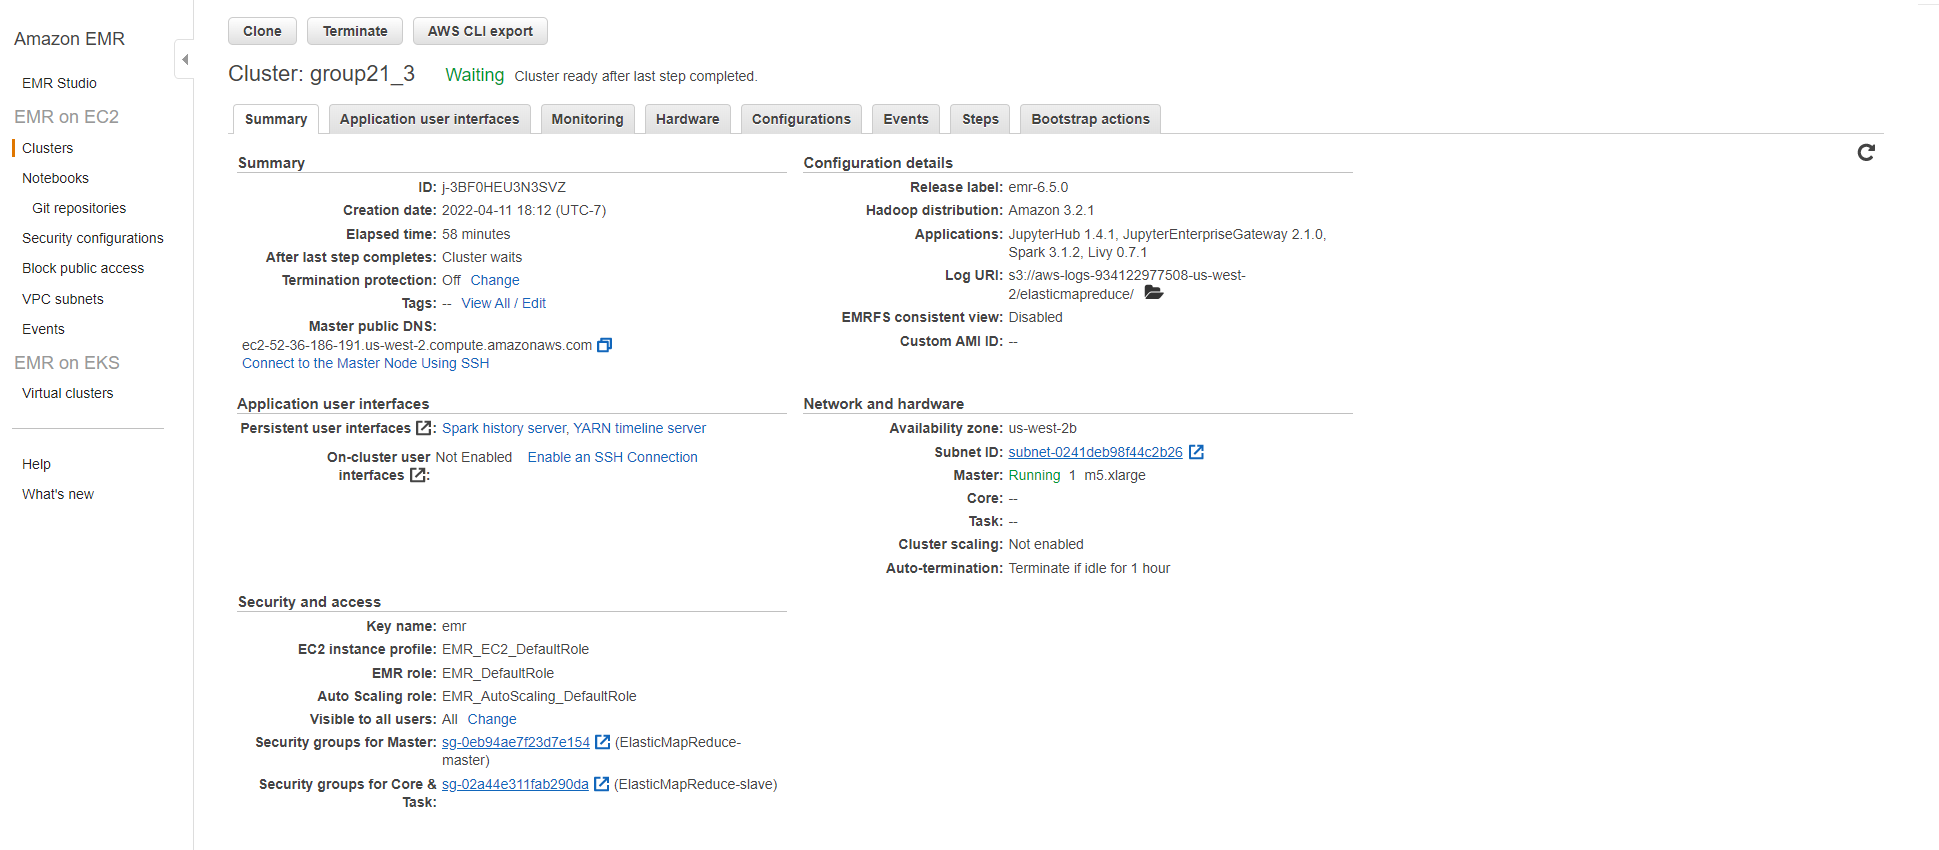

In [1]:
from IPython.display import Image

Image("../pic/m3_task1.png")

### 2. Setup your browser , jupyter environment & connect to the master node.
rubric={correctness:25}

2.1) Under cluster ```summary > Application user interfaces > On-cluster user interfaces```: Click on _***Enable an SSH Connection***_.

2.2) From instructions in the popup from Step 2.1, use: **Step 1: Open an SSH Tunnel to the Amazon EMR Master Node.** Remember you are running this from your laptop terminal, and after running, it will look like [this](https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone3/images/eg.png). For the private key make sure you point to the correct location in your computer.

2.3) (If you haven't done so from milestone 2) From instructions in the popup from Step 2.1, please ignore **Step 2: Configure a proxy management tool**. Instead follow  instructions given [here](https://docs.aws.amazon.com/emr/latest/ManagementGuide/emr-connect-master-node-proxy.html), under section **Example: Configure FoxyProxy for Firefox:**. Get foxy proxy standard [here](https://addons.mozilla.org/en-CA/firefox/addon/foxyproxy-standard/) 

2.4) Move to **application user interfaces** tab, use the jupytetHub URL to access it.

2.4.1) Username: ```jovyan```, Password: ```jupyter```. These are default more details [here](https://docs.aws.amazon.com/emr/latest/ReleaseGuide/emr-jupyterhub-user-access.html)

2.5) Login into the master node from your laptop terminal (```cluster summary > Connect to the Master Node Using SSH```), and install the necessary packages. Here are the needed packages based on my solution; you might have to install other packages depending on your approach.

    sudo yum install python3-devel
    sudo pip3 install pandas
    sudo pip3 install s3fs

**IMPORTANT:** 
- Make sure ssh -i ~/ggeorgeAD.pem -ND 8157 hadoop@xxxxx.compute.amazonaws.com (Step 2.2) is running in your terminal window before trying to access your jupyter URL. Sometimes the connection might lose; in that case, run that step again to access your jupyterHub.
- Don't confuse Step 2.2 and Step 2.5. In 2.2, you open an ssh tunnel to access the jupyterHub URL. With Step 2.6, you log into the master node to install the necessary packages.

#### Please attach this screen shots from your group for grading

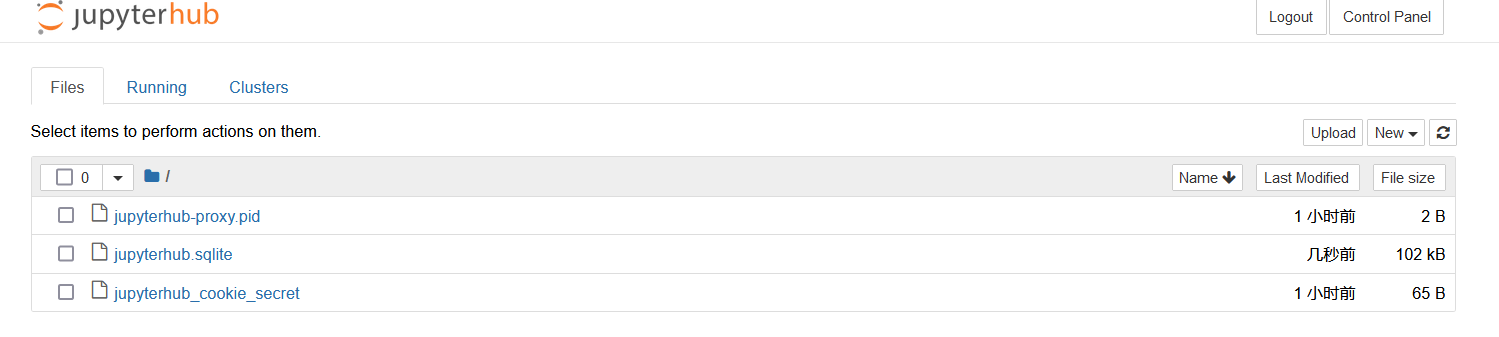

In [2]:
from IPython.display import Image

Image("../pic/m3_task2.png")

### 3. Develop a ML model using scikit-learn.
rubric={correctness:25}

You can either use the setup that we have from our last milestone. But it might have been shut down by AWS due to the time limit; also, we haven't got permission from AWS to spin up instances larger than t2.large. Considering the situation, I recommend doing this on your local computer. So upload this notebook to your local jupyter notebook and follow the instructions.
https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone3/Milestone3-Task3.ipynb

There are 2 parts to this notebook; For doing part 2, you want information from Task 4.

### 4. Obtain best hyperparameter settings using spark's MLlib.
rubric={correctness:20}

Upload this notebook to your jupyterHub (AWS managed jupyterHub in the cluster) you set up in Task 2 and follow the instructions given in the notebook.
https://github.ubc.ca/mds-2021-22/DSCI_525_web-cloud-comp_students/blob/master/release/milestone3/Milestone3-Task4.ipynb

### 5. Submission instructions
rubric={mechanics:5}

***SUBMISSION:*** Please put a link to your GitHub folder in the canvas where TAs can find the following-
- [X] Python 3 notebook, with the code for ML model in scikit-learn. (You can develop this on your local computer)
- [X] PySpark notebook, with the code for obtaining the best hyperparameter settings. ( For this, you have to use PySpark notebook(kernal) in your EMR cluster )
- [X] Screenshot from 
    - [X] Setup your EMR cluster (Task 1).
    - [X] Setup your browser, jupyter environment & connect to the master node (Task 2). 
    - [X] Your S3 bucket showing ```model.joblib``` file. (From Task 3 Develop a ML model using scikit-learn)

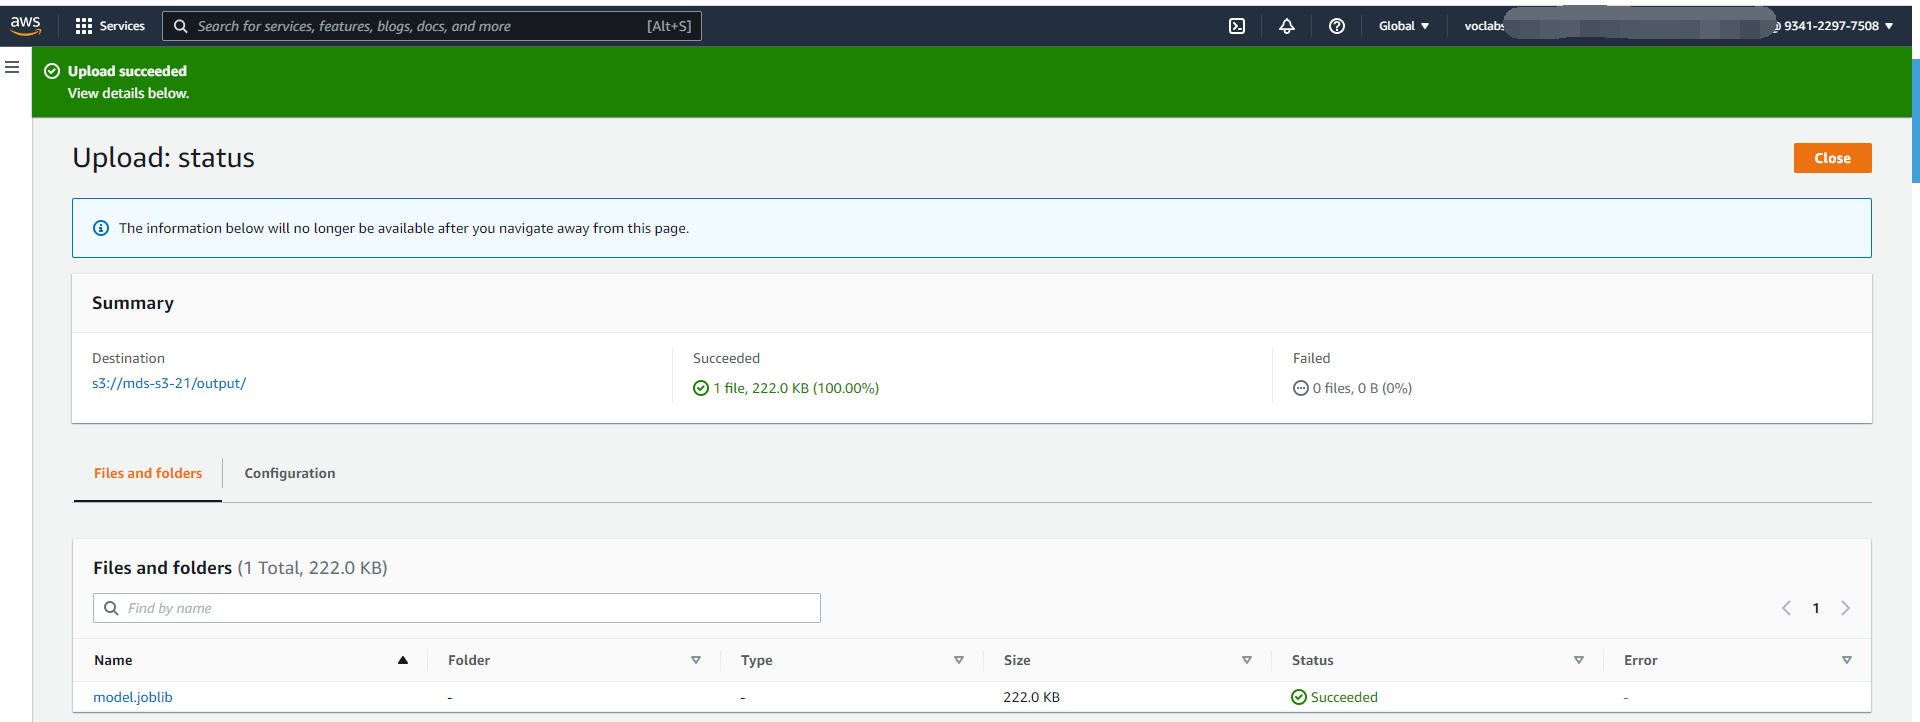

In [3]:
from IPython.display import Image

Image("../pic/m3_task3.png")